# ナイーブベイズ

すべての特徴量同士の関係について、目的変数を条件付けたもとでの条件付き独立をnaiveに仮定するモデル

特徴量$x_1,\dots,x_n$のもとでの目的変数$y$の確率$P(y\mid x_1,\dots, x_n)$を次のように表す

$$
P\left(y \mid x_1, \ldots, x_n\right)=\frac{P(y) P\left(x_1, \ldots, x_n \mid y\right)}{P\left(x_1, \ldots, x_n\right)}
$$

条件付き独立の仮定により

$$
P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)
$$

なので式は簡素化され

$$
P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}
$$

$P(x_1, \dots, x_n)$は入力を所与とすると定数なので

$$
\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}
$$



## 例

線形分離不可能問題が解けない様子

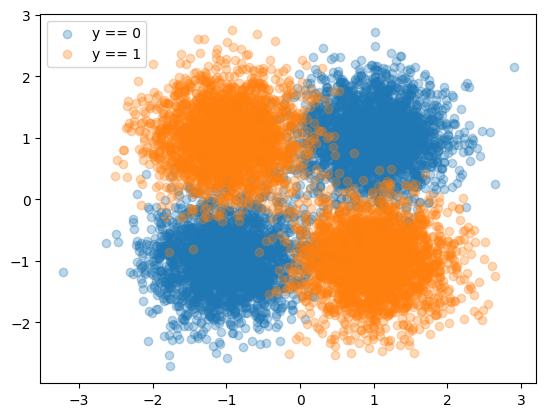

In [23]:
# データの用意
import numpy as np
from sklearn.datasets import make_blobs
centers = [(1, 1), (1, -1), (-1, 1),  (-1, -1)]
X, y = make_blobs(n_samples=10000, n_features=2, centers=centers, cluster_std=[0.5, 0.5, 0.5, 0.5], random_state=0)

def replace_label(y):
    if y == 2:
        return 1
    if y == 3:
        return 0
    return y

y = np.array(list(map(replace_label, y)))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for y_val in set(y):
    idx = y == y_val
    ax.scatter(X[idx, 0], X[idx, 1], label=f"y == {y_val}", alpha=0.3)
ax.legend()
fig.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

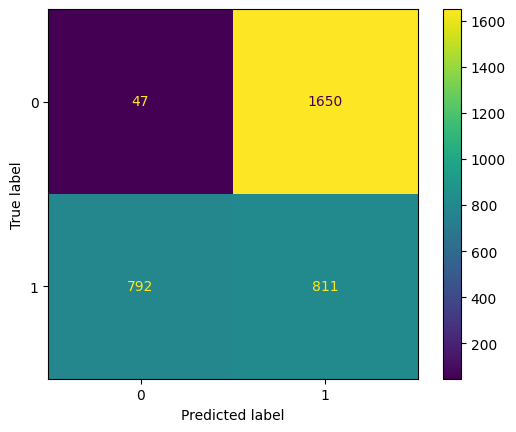

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

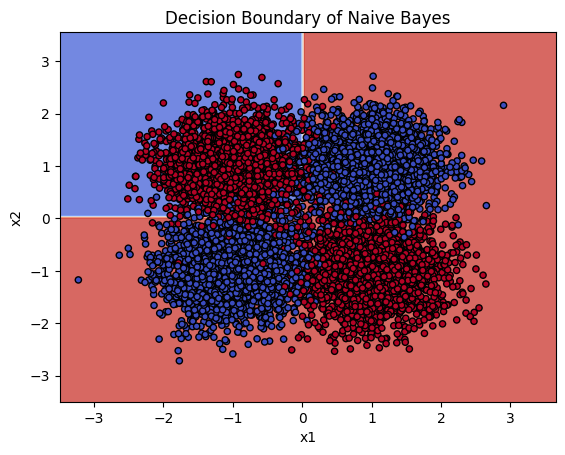

In [27]:
from sklearn.inspection import DecisionBoundaryDisplay
fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_test,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
    xlabel="x1",
    ylabel="x2",
)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set(title="Decision Boundary of Naive Bayes")
fig.show()

## 参考文献

- [1.9. Naive Bayes — scikit-learn 1.4.1 documentation](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes)